# Welcome To The Practice Notebook
---

Importing the pandas library

In [1]:
import pandas as pd

Import the json Imdb Dataset

In [30]:
data = pd.read_json("movies_dataset.json")

In [11]:
data

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,English,Canada,NaN,2013.0,7.7
5039,Color,NaN,43.0,43.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,NaN,NaN,7.5
5040,Color,Benjamin Roberds,13.0,76.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,1400.0,2013.0,6.3
5041,Color,Daniel Hsia,14.0,100.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,NaN,2012.0,6.3


Answer to the following Analytical questions:

Question 1: Which country has gained the highest average IMdb Score according to our data? <br>
Use a bar chart to visualize your results

country
Kyrgyzstan              8.700000
Libya                   8.400000
United Arab Emirates    8.200000
Egypt                   8.100000
Soviet Union            8.100000
Iran                    7.725000
Poland                  7.620000
Indonesia               7.600000
Israel                  7.525000
Sweden                  7.516667
Name: imdb_score, dtype: float64


<AxesSubplot: xlabel='country'>

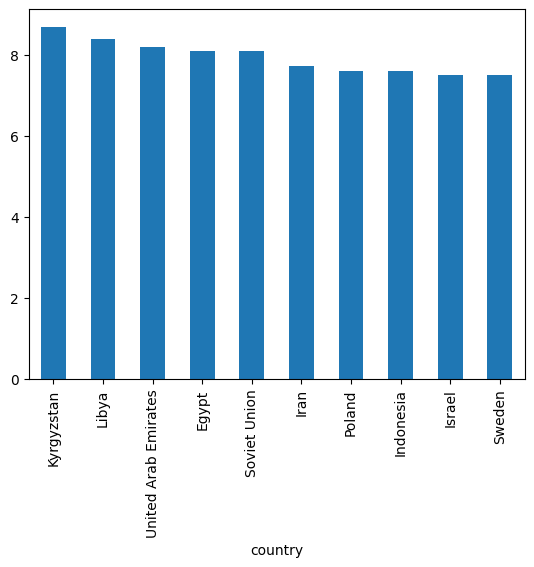

In [33]:
data1 = data.groupby('country')['imdb_score'].mean().sort_values(ascending=False)
data1= data1.head(10)
print(data1)
data1.plot(kind='bar',x='country',y='imdb_score')

Question 2: How many `colored` and `Black&White` movies do we have in our dataset?

In [23]:
data2= data[data['color']=='Color']
x= data2.groupby('color')['color'].count()
print(data2.shape)
print(x)

data22= data[data['color']=='Black and White']
y= data22.groupby('color')['color'].count()
print(data22.shape)
print(y)



(4815, 14)
color
Color    4815
Name: color, dtype: int64
(209, 14)
color
Black and White    209
Name: color, dtype: int64


Question 3: Which movies of `Christopher Nolan` has the highest IMdb Score? <br>
Use a barchart to visualize the results

(8, 14)
movie_title
Insomnia                 7.2
Batman Begins            8.3
Memento                  8.5
The Dark Knight Rises    8.5
The Prestige             8.5
Interstellar             8.6
Inception                8.8
The Dark Knight          9.0
Name: imdb_score, dtype: float64


<AxesSubplot: xlabel='movie_title'>

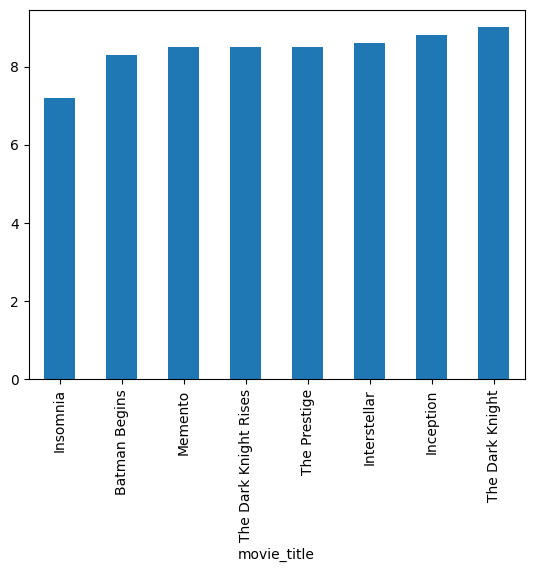

In [35]:
data3=data[data.director_name == 'Christopher Nolan']
# print(data3.shape)
data3 = data3.groupby('movie_title')['imdb_score'].sum().sort_values(ascending=True)
print(data3)
data3.plot(kind = 'bar', x='movie_title', y='imdb_score')

Question 4: Use a line chart to visualize how many movies have been produced in `USA` from `2010` to `2015`.

title_year
2010.0    167
2011.0    164
2012.0    173
2013.0    171
2014.0    187
2015.0    171
Name: movie_title, dtype: int64


<AxesSubplot: xlabel='title_year'>

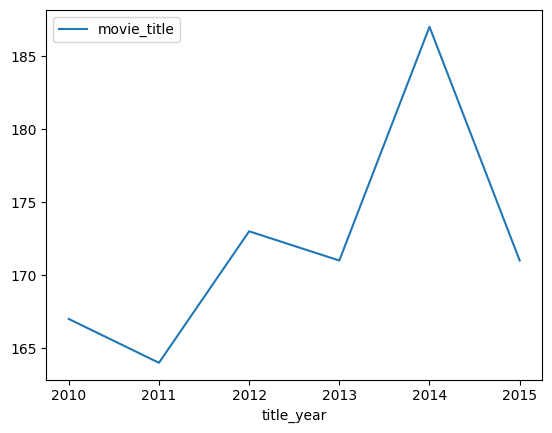

In [14]:
data4=data[data['country']=='USA']
# print(data4.shape)
data4=data4[(data4['title_year'] >= 2010.0) & (data4['title_year'] <= 2015.0)]
# print(data4.shape)

data4=data4.groupby('title_year')['movie_title'].count()
print(data4)
# count = data3['title_year'].value_counts
# print(count)
data4.plot(kind='line',x='title_year', legend='movie_title')